In [1]:
from collections import OrderedDict
import pickle
import numpy as np
import operator
import commonFunctions as cf
import csv
import matplotlib.pyplot as plt

In [2]:
def plot_boxplot(plt,tempList):
    plt.close()
    fig,ax=plt.subplots(figsize=(3,2),dpi=300)

    plt,ax=cf.setplot(plt,ax)

    plt.boxplot(tempList,whis=15)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    ax.hlines(np.percentile(tempList,10),0.75,1.25,color='r',linewidth=0.5,label='10th Percentile',linestyle='--')
    ax.hlines(np.mean(tempList),0.75,1.25,color='b',linewidth=0.7,label='Mean',linestyle='--')
    ax.hlines(np.percentile(tempList,90),0.75,1.25,color='r',linewidth=0.5,label='90th Percentile',linestyle='--')
    print(np.percentile(tempList,90),np.percentile(tempList,10))

    plt.ylabel('Lifespan')
    plt.legend(loc='upper right',prop={'size': 5})
    plt.xticks([])
    plt.savefig('sup_boxplot.png',bbox_inches='tight')
    plt.show()
    return

In [3]:
# Write file with names of terrorist organizations, first observation year, last observation year, and status

f=open("pipeFormat.csv","r")
next(f)
yearIndex=cf.getIndex('year')
nagcodeIndex=cf.getIndex('nagcode_1')
nagnameIndex=cf.getIndex('nag_name')
data = OrderedDict()
name_lookup = {}
for l in f:
    row=l.split("|")
    year=int(row[yearIndex])
    nagcode=int(row[nagcodeIndex])
    nagname=row[nagnameIndex]
    if nagcode not in data:
        data[nagcode]=set()
        name_lookup[nagcode] = nagname
    data[nagcode].add(year)
    
fw = open("Organizations_Studied.csv","w",newline='')
writer = csv.writer(fw)
new_headers = ['NAG_Code','NAG_Name','First Observed Year','Last Observed Year','Status in 2010','Lifespan (in years)']
writer.writerow(new_headers)

for nagcode in data:
    first_yr = min(data[nagcode])
    last_yr = max(data[nagcode])
    status = 'Alive' if last_yr == 2010 else "Dead"
    # duration = 'Null' if status=="Alive" else (last_yr - first_yr)+1
    duration = (last_yr - first_yr)+1
    list_lt = [nagcode, name_lookup[nagcode],first_yr,last_yr,status,duration]
    writer.writerow(list_lt)
    
fw.close()

In [4]:
# make pickles for alive, dead, yearLength, year1 and year31

alive, dead, yearLength, year1, year31 = [], [],{},[] ,[]
yearDied = {}
for i in range(1945,2010):
    yearDied[i] = []

f = open("Organizations_Studied.csv","r")
reader = csv.reader(f,delimiter=',')
next(reader)
for row in reader:
    nagcode = int(row[0])
    syear = int(row[2])
    eyear = int(row[3])
    status = row[4]
    lspan = row[5]
    lspan = int(lspan) if lspan!='Null' else None
    if status == 'Dead':
        dead.append(nagcode)   
        yearDied[eyear].append(nagcode)
    elif status == "Alive":
        alive.append(nagcode)
    yearLength[nagcode] = lspan
    if lspan:
        if lspan<=1:
            year1.append(nagcode)
        if lspan>=31:
            year31.append(nagcode)
        
f.close() 

cf.dumpPickle('yearLength',yearLength)
cf.dumpPickle('alive',alive)
cf.dumpPickle('dead',dead)
cf.dumpPickle('year1',year1)
cf.dumpPickle('year31',year31)
cf.dumpPickle('yearDied',yearDied)

31.0 1.0


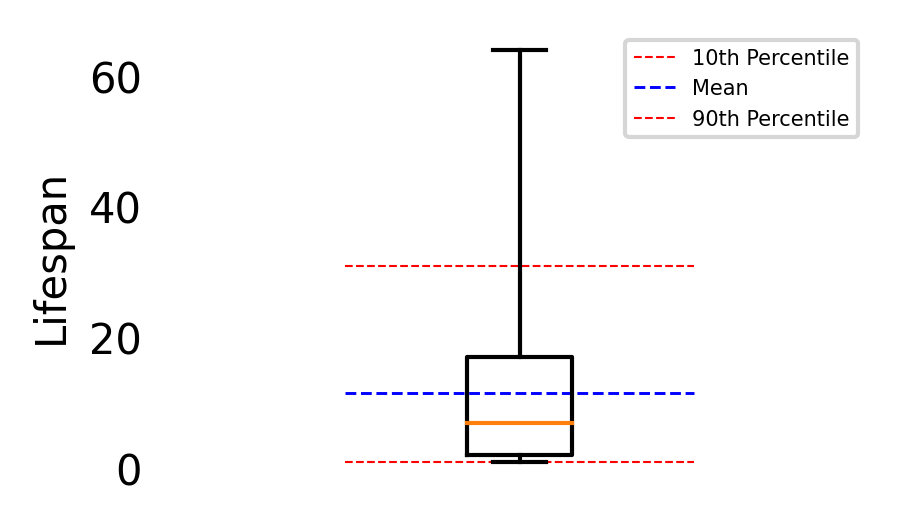

OrderedDict([('n', 459), ('Mean', 11.525054466230937), ('10th P', 1.0), ('25th P', 2.0), ('50th P', 7.0), ('75th P', 17.0), ('90th P', 31.0)])


In [5]:
# readind the above file and reporting statistics

lifespan_lt = []
f = open("Organizations_Studied.csv","r")
reader = csv.reader(f,delimiter=',')
next(reader)
for row in reader:
    lspan = row[-1]
    if lspan!='Null':
        lifespan_lt.append(int(lspan))
        
f.close()        
# stats = cf.get_basic_stats(lifespan_lt)
# print(stats)
plot_boxplot(plt,lifespan_lt)

stats = cf.get_basic_statsv2(lifespan_lt)
print(stats)


In [8]:
# stats for Total,10th and 90th percentile

print("Total",len(lifespan_lt),np.mean(lifespan_lt),np.std(lifespan_lt))

temp = []
for year in lifespan_lt:
    if year<=1:
        temp.append(year)
print("10th P",len(temp),np.mean(temp),np.std(temp)) 

temp = []
for year in lifespan_lt:
    if year<=2:
        temp.append(year)
print("25th P",len(temp),np.mean(temp),np.std(temp)) 


temp = []
for year in lifespan_lt:
    if year>=17:
        temp.append(year)
print("75th P",len(temp),np.mean(temp),np.std(temp)) 


temp = []
for year in lifespan_lt:
    if year>=31:
        temp.append(year)
print("90th P",len(temp),np.mean(temp),np.std(temp))   

Total 459 11.525054466230937 12.306228994125572
10th P 88 1.0 0.0
25th P 127 1.3070866141732282 0.46128562254730116
75th P 117 29.444444444444443 10.309272603556225
90th P 47 40.212765957446805 7.23153899106315


In [7]:
# # Stats for Alive and Total 459

# temp = []
# f = open("Organizations_Studied.csv","r")
# reader = csv.reader(f,delimiter=',')
# next(reader)
# for row in reader:
#     lspan = row[-1]
#     status = row[-2]
#     first_year = int(row[2])
#     end_year = int(row[3])
#     if status=='Alive':
#         temp.append((end_year-first_year)+1)
# print("Alive",len(temp),np.mean(temp),np.std(temp)) 
# f.close()

# temp = []
# f = open("Organizations_Studied.csv","r")
# reader = csv.reader(f,delimiter=',')
# next(reader)
# for row in reader:
#     lspan = row[-1]
#     status = row[-2]
#     first_year = int(row[2])
#     end_year = int(row[3])
  
#     temp.append((end_year-first_year)+1)
# print("Total 459",len(temp),np.mean(temp),np.std(temp)) 
# f.close()

Alive 85 20.729411764705883 15.263480626333228
Total 459 459 11.525054466230937 12.306228994125572


In [9]:
getDetails()

NameError: name 'getDetails' is not defined

In [10]:
len(lifespan_lt)

459

In [ ]:
# temp = [i for i in lifespan_lt if i<3]
# print("<3",len(temp),np.mean(temp),np.std(temp))

In [11]:
np.percentile(lifespan_lt,75)

17.0